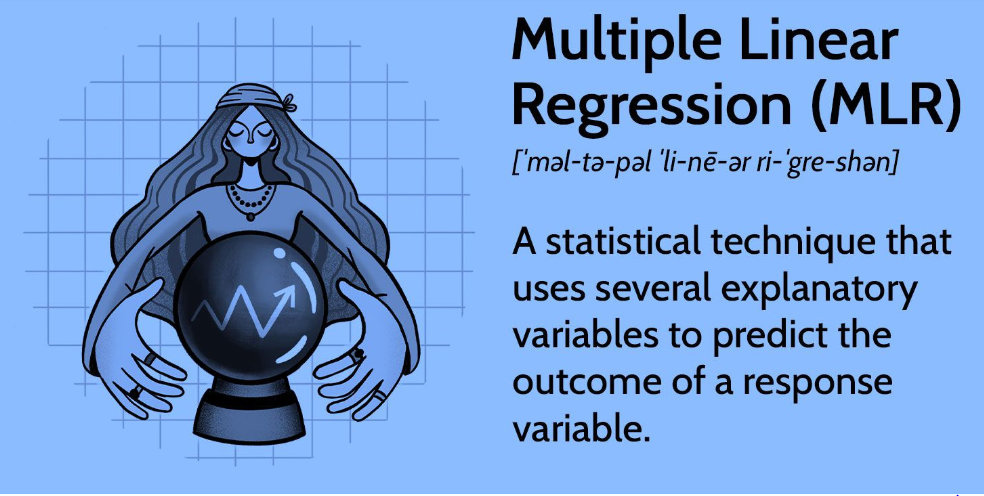

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
df_index=pd.read_csv("https://github.com/itsAkkil/ML/raw/main/Data%20Sets/economic_index.csv")

In [128]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [129]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [130]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [131]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

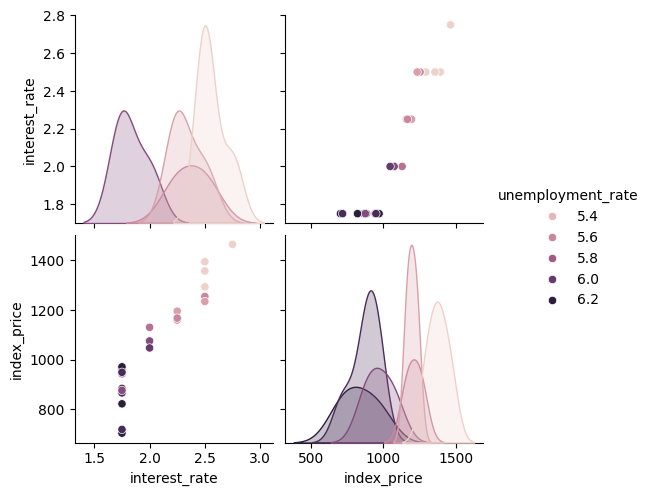

In [132]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index,hue='unemployment_rate')

In [133]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

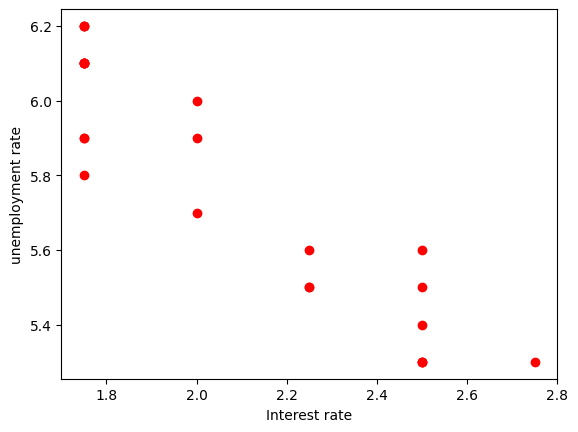

In [134]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [135]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [136]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [137]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [138]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [139]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

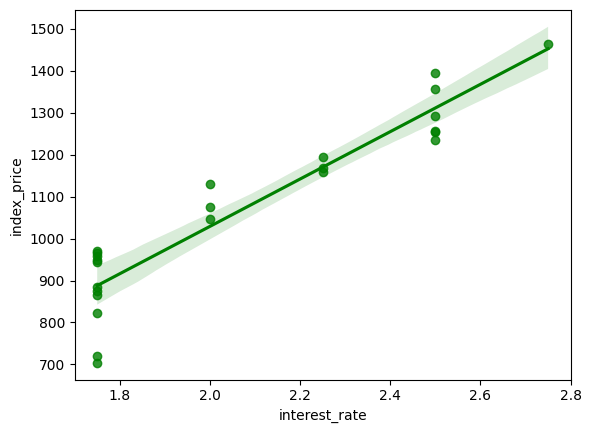

In [140]:
# sns.regplot(df_index['interest_rate'],df_index['index_price']) # works in older versions now we need to define X and y

# sns.regplot(x='interest_rate', y='index_price', data=df_index)
sns.regplot(x='interest_rate', y='index_price', data=df_index, color="g")
# sns.scatterplot(x='interest_rate', y='index_price', data=df_index, hue="interest_rate")

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

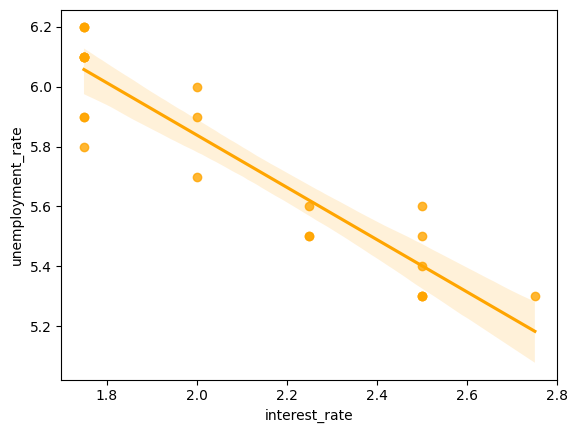

In [141]:
sns.regplot(x='interest_rate',y='unemployment_rate', data=df_index,color='orange')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

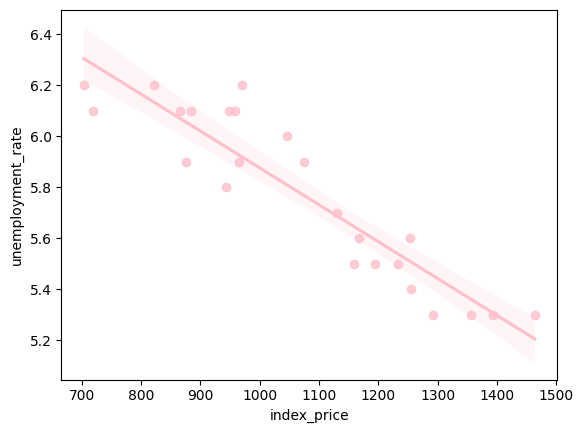

In [142]:
sns.regplot(x='index_price',y='unemployment_rate', data=df_index,color='pink')

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [145]:
pd.DataFrame(X_train).describe()

,0,1
count,1.800000e+01,1.800000e+01
mean,6.291264e-16,1.788693e-16
std,1.028992e+00,1.028992e+00
min,-9.011551e-01,-1.481878e+00
25%,-9.011551e-01,-8.615569e-01
50%,-5.325007e-01,2.240048e-01
75%,1.310771e+00,9.994060e-01
max,1.310771e+00,1.309566e+00


In [146]:
pd.DataFrame(X_test).describe()

,0,1
count,6.000000,6.000000
mean,0.204808,-0.034462
std,1.118184,1.103869
min,-0.901155,-1.481878
25%,-0.716828,-0.784017
50%,0.204808,-0.086156
75%,0.573462,0.844326
max,2.048080,1.309566


In [147]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [148]:
regression.fit(X_train,y_train)

LinearRegression()

In [149]:
regression.coef_

array([  88.27275507, -116.25716066])

In [150]:
regression.intercept_

1053.4444444444443

#Model Training is done

In [151]:
#Predicting the values for training and testing sets

y_train_pred = regression.predict(X_train)

y_test_pred = regression.predict(X_test)

In [152]:
from sklearn.metrics import r2_score


In [153]:
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_test_pred)

In [154]:
print(f'train accuracy: {train_accuracy}')
print(f'test accuracy: {test_accuracy}')

train accuracy: 0.9030782287244159
test accuracy: 0.8278978091457145


Performace Matrics

In [155]:
## Performance Metrics for Trian Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4304.912093363592
52.823095335540884
65.61182891341768


In [156]:
## Performance Metrics for Test Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


# Hence Conclusion : Generalized Model!

1.   Low Bias
2.   Low Variance



In [157]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [158]:
np.mean(validation_score)

-5914.828180162386

In [159]:
## prediction
y_pred=regression.predict(X_test)

In [160]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [161]:
## Performance Metrics - testing data
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [162]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


## Assumptions

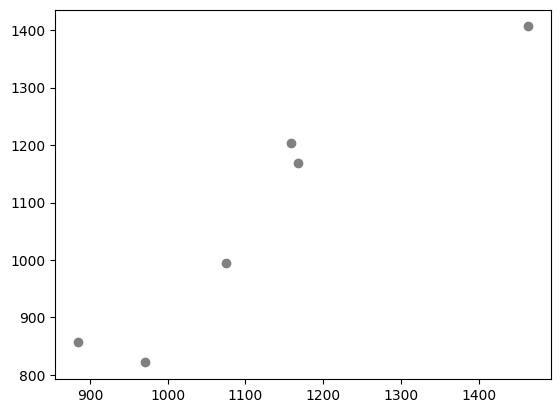

In [163]:
plt.scatter(y_test,y_pred,color='grey')

In [164]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


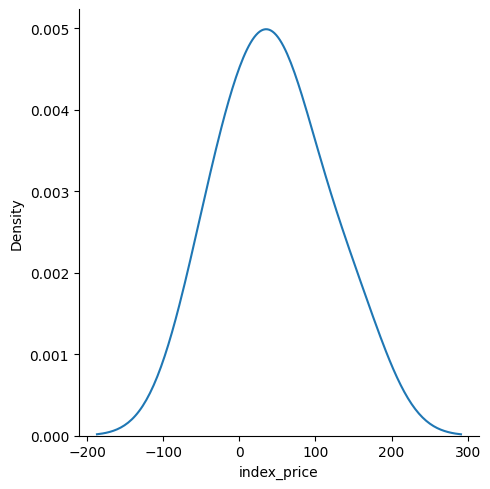

In [165]:
## Plot this residuals
sns.displot(residuals,kind='kde')

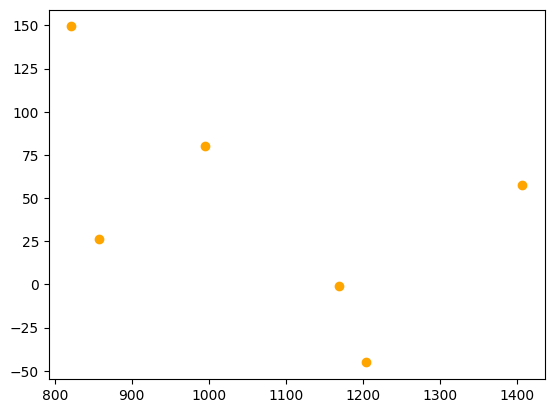

In [166]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals,color='orange')

In [167]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [168]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                       0.754
Time:                        13:31:02   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [169]:
print(regression.coef_)

[  88.27275507 -116.25716066]
